In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kanto = pd.read_csv('./kanto.csv')
kansai = pd.read_csv('./kansai.csv')
n_cluster = 4

In [3]:
kanto_target = kanto[kanto['cluster_number'] == 0]

In [4]:
len(kanto_target)

750

In [5]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
pc = kanto_target[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    348
1    173
2    228
3      1
Name: second_cluster_number, dtype: int64


Text(0, 0.5, 'count')

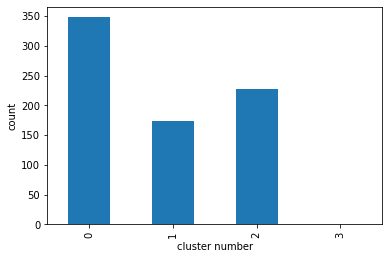

In [6]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=n_cluster, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='second_cluster_number', index=kanto_target.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [7]:
# 駅のデータにクラスター番号のデータを結合
kanto_target_with_cluster = pd.concat([kanto_target, pd.Series(labels, index=kanto_target.index)], axis=1)

# 先頭の5行を表示
kanto_target_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,cluster_number,pc1,pc2,station_name_roman,second_cluster_number
0,1130506,1130506,東所沢,NaN,NaN,11305,11,359-0022,所沢市本郷１丁目,139.513878,...,22317.256266,1.033771,0.002147,366.0,165.080220,0,-0.932476,0.728841,higashitokorozawa,2
1,1130507,1130507,新座,NaN,NaN,11305,11,352-0011,新座市野火止５丁目,139.556328,...,18873.557190,1.096247,0.003834,277.0,115.765803,0,-1.186589,-0.635504,niiza,0
2,1130508,1130508,北朝霞,NaN,NaN,11305,11,351-0033,朝霞市浜崎１丁目,139.587322,...,22209.618128,1.058486,0.001174,335.0,134.570673,0,0.137028,-0.274607,kitaasaka,2
6,1130512,1130512,東浦和,NaN,NaN,11305,11,336-0922,さいたま市緑区大牧,139.704627,...,24374.961347,1.047661,0.001238,372.0,171.841479,0,-0.039878,0.508106,higashiurawa,2
7,1130513,1130513,東川口,NaN,NaN,11305,11,333-0811,川口市戸塚１丁目,139.744087,...,23193.649554,1.021008,0.000000,421.0,176.316615,0,-0.600714,0.821456,higashikawaguchi,2


In [8]:
import folium
center_lat, center_lon = (35.6812, 139.7671) # 東京の緯度経度
#center_lat, center_lon = (34.6413, 135.5629) # 大阪の緯度経度

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in kanto_target_with_cluster.iterrows():
    color = 'red' if station['second_cluster_number'] == 0 else 'pink' if station['second_cluster_number'] == 1 else 'blue' if station['second_cluster_number'] == 2 else 'green' if station['second_cluster_number'] == 3 else 'orange' if station['second_cluster_number'] == 4 else 'violet' if station['second_cluster_number'] == 5 else 'yellow' if station['second_cluster_number'] == 6 else 'gray' if station['second_cluster_number'] == 7 else 'black'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [9]:
kansai_target = kansai[kansai['cluster_number'] == 3]

In [10]:
# データの列の絞り込み
pc = kansai_target[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0     97
1     98
2    161
3    126
Name: second_cluster_number, dtype: int64


Text(0, 0.5, 'count')

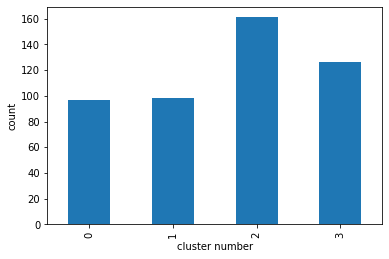

In [11]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=n_cluster, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='second_cluster_number', index=kansai_target.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [12]:
# 駅のデータにクラスター番号のデータを結合
kansai_target_with_cluster = pd.concat([kansai_target, pd.Series(labels, index=kansai_target.index)], axis=1)

# 先頭の5行を表示
kansai_target_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km,cluster_number,Unnamed: 0,pc1,pc2,second_cluster_number
0,1141501,1141501,米原,NaN,NaN,11415,25,521-0012,米原市米原,136.289992,...,150.139302,142.085853,34322.719402,17515.236022,105.845332,3.0,0.0,0.230387,-1.569542,3
3,1141504,1141504,長浜,NaN,NaN,11415,25,526-0057,長浜市北船町,136.264901,...,169.449737,160.531330,39682.901005,20010.420220,118.562355,3.0,3.0,-0.940342,-1.519442,1
7,1141508,1141508,木ノ本,NaN,NaN,11415,25,529-0425,滋賀県長浜市木之本町木之本1543,136.221706,...,126.345700,120.106406,31217.486124,16100.821607,74.351585,3.0,7.0,0.668550,-1.879590,3
10,1142201,1142201,東舞鶴,NaN,NaN,11422,26,625-0036,舞鶴市浜,135.394788,...,203.145282,193.134016,38621.356216,21016.385177,156.843175,3.0,10.0,-2.239508,-0.284976,1
15,1150312,1141501,米原,NaN,NaN,11503,25,521-0012,米原市米原,136.289992,...,150.139302,142.085853,34322.719402,17515.236022,105.845332,3.0,15.0,0.230387,-1.569542,3


In [13]:
for _, station in kansai_target_with_cluster.iterrows():
    color = 'red' if station['second_cluster_number'] == 0 else 'pink' if station['second_cluster_number'] == 1 else 'blue' if station['second_cluster_number'] == 2 else 'green' if station['second_cluster_number'] == 3 else 'orange' if station['second_cluster_number'] == 4 else 'violet' if station['second_cluster_number'] == 5 else 'yellow' if station['second_cluster_number'] == 6 else 'gray' if station['second_cluster_number'] == 7 else 'black'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [14]:
_map.save(f'residential2_stations_by_{n_cluster}.html') # 保存